# إذا كنت ترغب التطبيق مباشرةً على الإنترنت : النسخة موجودة [هنا](https://www.kaggle.com/code/ninamaamary/knn-arabic-iris) 

<div dir="rtl">
<h1>الاستيرادات</h1>
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
sns.set_style("whitegrid") 
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")

<div style="background-color:black; " align="center">
<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExeHN0Ym50OW92ZXp6cjljdjAxNDM2eW9ha2JyaDAzcHp1M285M2RzYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/cNFFHJ5Ki8KBJbS2Lt/giphy.gif" alt="gif" width="200" height="200">
</div>

<div dir="rtl">
<h2>خوارزمية K-Nearest Neighbors  </h2>
اليوم راح نبدأ بـ <strong> KNN</strong> لأنها تعتبر مدخل ممتاز لفهم التصنيف والانحدار.  
<h2>💡 الفكرة الأساسية  </h2>
أحيانًا من الجيد تطمّن على جارك، وهذا بالضبط ما تفعله خوارزمية KNN!  
فهي تتنبأ بتصنيف نقطة جديدة بناءً على جيرانها الأقرب.  
في الشكل أدناه، نرى بيانات **مجموعة أزهار Iris**، وكل نقطة تمثل نوعًا من الأزهار (setosa، versicolor، virginica).  
إذا ظهرت نقطة جديدة، تقوم KNN بتخمين نوعها حسب أقرب النقاط لها.  
</div>

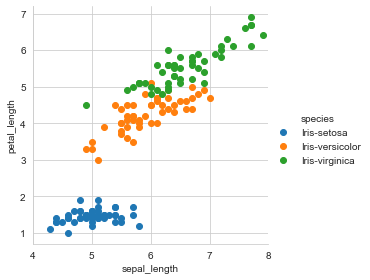

In [2]:
IRIS_PATH = os.path.join("..", "..", "datasets", "IRIS", "IRIS.csv")

iris = pd.read_csv(IRIS_PATH)
sns.FacetGrid(iris, hue ="species", height = 4, xlim=(4,8)).map(plt.scatter,'sepal_length','petal_length').add_legend() 

<div dir="rtl">
<h2>🎯 ما المقصود بـ "الأقرب"؟ </h2> 
في KNN عادة نقيس مدى القرب باستخدام <strong>مسافة إقليدية (Euclidean distance)</strong>، وهي ببساطة الخط المستقيم بين نقطتين في الفضاء.  
في حالتنا، هي المسافة بين نقطة الاختبار وأقرب جيرانها.  
وصيغتها العامة هي:      
<div dir="ltr" align="center">
$$d(p, q) = \sqrt{\sum\limits_{i=1}^{n} (q_i - p_i)^2}$$
</div>  
لكن توجد مقاييس أخرى للمسافة مثل:
    
* Manhattan  
* Cosine similarity
  
<div dir="rtl">  
⚠️ <strong>ملاحظة:</strong> بما أننا نحسب المسافة، من المهم أن تكون جميع الخصائص (features) على نفس المقياس (scale).  
</div>
<h2>⚖️ مقياس الخصائص (Feature Scale) </h2> 
في بيانات <code>iris-flower-dataset</code> جميع الخصائص مقاسة بالسنتيمتر (<strong>cm</strong>).  
لكن لو غيرنا واحدة إلى المتر (<strong>m</strong>) ثم رسمناها، ستلاحظ أن النقاط كلها ستبدو كأنها على خط واحد!  
وهذا لأن KNN <strong>حساس جدًا لمقياس الخصائص</strong> لذلك يجب <strong>توحيد أو تطبيع البيانات</strong>. 
</div>

In [3]:
# Cm as metric unit
print("تستخدم جميع الخصائص وحدة (سم) كوحدة مترية")
iris.head()

تستخدم جميع الخصائص وحدة (سم) كوحدة مترية


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


تستخدم خاصية واحدة (م) كوحدة مترية


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.051,3.5,1.4,0.2,Iris-setosa
1,0.049,3.0,1.4,0.2,Iris-setosa
2,0.047,3.2,1.3,0.2,Iris-setosa
3,0.046,3.1,1.5,0.2,Iris-setosa
4,0.050,3.6,1.4,0.2,Iris-setosa


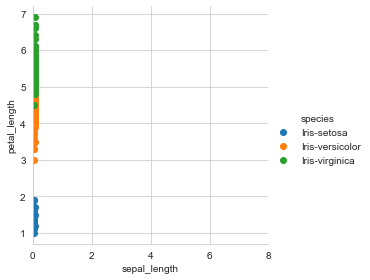

In [4]:
# Change 1 feature to m
broken_unit_iris = iris.copy(deep=True)
broken_unit_iris['sepal_length'] = broken_unit_iris['sepal_length']*1/100 # convert to m

print("تستخدم خاصية واحدة (م) كوحدة مترية")
display(broken_unit_iris.head())

sns.FacetGrid(broken_unit_iris, hue ="species", height = 4, xlim=(0,8)).map(plt.scatter,'sepal_length','petal_length',).add_legend()

<div dir="rtl">
<h2>📐 التطبيع والتوحيد (Normalization & Standardization)</h2>
لما تكون الخصائص على نفس المقياس، أداء KNN يتحسن بشكل واضح، ويصير النموذج أسهل في الفهم، وحتى القيم الشاذة (outliers) يكون التعامل معها أسهل.  

- **التوحيد (Standardization):**  
يتم فيه جعل القيم حول المتوسط وبانحراف معياري مقداره 1:

<div dir="ltr" align="right"> 
$X_{std} = \frac{X - \mu x} {\sigma x}$  
</div> 
<code>from sklearn.preprocessing import scale
df[:] = scale(df)
</code>

- **التطبيع (Normalization):**  
يتم فيه جعل القيم ضمن مدى محدد عادة بين 0 و 1:
<div dir="ltr" align="right"> 
$X_{norm} = \frac{X - min(X)} {max(X) - min(X)}$
</div> 
<code>from sklearn.preprocessing import minmax_scale
df[:] = minmax_scale(df)
</code>
</div>

<div dir="rtl">
<h2>K❓</h2>  
القيمة <strong>k</strong> تحدد عدد الجيران اللي ننظر إليهم.  
مثلاً إذا كانت k=3، نأخذ أقرب 3 نقاط ونقرر التصنيف حسب **تصويت الأغلبية** (في التصنيف) أو نحسب المتوسط (في الانحدار).  

<div class="alert alert-block alert-info">
<b>ما هو أفضل K؟:</b> 
<ul>
  <li>K كبيرة جدًا ← النموذج بسيط جدًا وقد لا يتعلم جيدًا (Underfitting)</li>
  <li>K صغيرة جدًا ← النموذج معقد جدًا وقد يتأثر بالضجيج (Overfitting)</li>
  <li>الحل؟ جرب أكثر من قيمة وشوف النتائج بنفسك!</li>
</ul>
</div>

<div dir="rtl">
⚠️ <strong>ملاحظة</strong> في حالة التصنيفات الثنائية، من الأفضل اختيار <strong>عدد فردي لـ K</strong> لتجنب التعادل في التصويت ☺️  
</div> 

<h3> الأوزان (Weighting)</h3>  
زي ما قلنا، KNN تعتمد على تصويت الجيران، لكن كل جار ممكن يكون له وزن مختلف: 

- **Uniform:** كل الجيران لهم نفس التأثير ☭  
- **Distance-based:** الجيران الأقرب تأثيرهم أكبر  

<h2>🧐 التحيز الاستقرائي (Inductive Bias)</h2>  
هو مجموعة الافتراضات اللي يعتمد عليها النموذج أثناء التنبؤ.  
في KNN نعمل افتراضين أساسيين:  
- النقاط القريبة من بعضها غالبًا تنتمي لنفس الفئة  
- كل خاصية (feature) تساهم بالتساوي في حساب المسافة
</div>

<div dir="rtl">
<h2>🏋️ مرحلة التدريب </h2> 
ما في مرحلة تدريب فعلية في KNN!  
كل اللي تسويه هو تخزين مجموعة البيانات واستخدامها لاحقًا للتنبؤ.  

<h2>🧗 مرحلة الاختبار </h2>
عند وصول نقطة جديدة، يقارن النموذج هذه النقطة مع كل النقاط في مجموعة التدريب،  
ثم يحدد <strong>أقرب K نقاط</strong> ويتنبأ بالناتج حسب <strong>تصويت الأغلبية</strong> (في التصنيف) أو <strong>متوسط القيم</strong> (في الانحدار).  

<h2>(Hyperparameters)</h2>  
هي القيم اللي تختارها أثناء التجربة، ويفضل دايمًا تجربها باستخدام <strong>مجموعة تحقق (validation set)</strong>.  
المعاملات الأساسية في KNN:  

- قيمة K  
- مقياس المسافة المستخدم  
- طريقة الوزن  

<h2>🎭 المزايا والعيوب </h2>
فهم إيجابيات وسلبيات KNN مهم جدًا لتعرف متى تستخدمها، ومتى ممكن تسبب لك صداع 😅  
هالجزء يساعدنا نحل مشاكل الأداء إذا النموذج ما أعطى نتائج كويسة.  

<div class="alert alert-block alert-info">
<b>المزايا:</b> 
<ul>
  <li>بسيطة وسهلة الفهم</li>
  <li>ما تحتاج تدريب (O(1))</li>
  <li>تعمل في التصنيف والانحدار</li>
</ul>
</div>

<div class="alert alert-block alert-danger">  
<b>العيوب:</b> 
<ul>
  <li>زمن التنبؤ طويل (O(nm)) حيث n عدد الخصائص و m عدد النقاط</li>
  <li>تعاني من لعنة الأبعاد العالية (Curse of Dimensionality)</li>
  <li>حساسة للقيم الشاذة والمقاييس المختلفة</li>
  <li>تحتاج تخزين كل بيانات التدريب في الذاكرة</li>
</ul>
</div>
</div>

<div dir="rtl">
<h2>💻 التطبيق العملي </h2> 
وأخيرًا خلصنا الجزء النظري 🎉  
الآن ننتقل للتطبيق العملي باستخدام   
<code>sklearn.neighbors.KNeighborsClassifier</code>
على مجموعة البيانات <code>iris-flower-dataset</code>
</div>

In [5]:
# الخطوة 1: تحويل الفئات إلى بيانات رقمية
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
iris['species'] = label_encoding.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# الخطوة 2: تقسيم مجموعة البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split

X,y = iris.loc[:,:'petal_width'].to_numpy() , iris['species'].to_numpy()

# 2.1 تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 2.2 تقسيم بيانات التدريب إلى تدريب وتحقق (تحقق)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

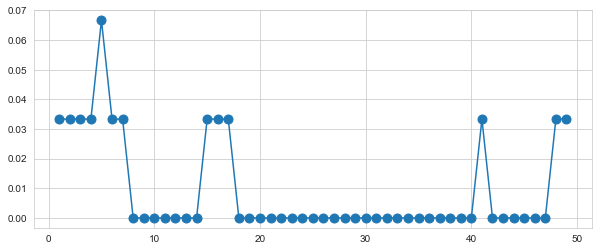

In [7]:
# الخطوة 3: العثور على أفضل قيمة لـ K
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    # استخدم بيانات التحقق وليس الاختبار!!!
    y_pred = knn.predict(X_val)
    error_rate.append(np.mean(y_pred != y_val))

plt.figure(figsize=(10, 4))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [8]:
#  الخطوة 4 مرحلة التدريب بـ 
# K = 10 
# لأن الخطأ كان منخفضًا في حوالي 8-14
model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [9]:
# الخطوة 5: مرحلة الاختبار
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy * 100)

Accuracy: 100.0


<div style="background-color:#3B8923;" align="center">
<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExdzVlYmpjNHEwbXp0cWVodnQ1N3Z5Z3NnODYyNG9pd2dpZ3kzMW16ZCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/12FLhMHdanoLJK/giphy.gif" alt="gif" width="200" height="200" style="border-radius:90%"></div>